In [68]:
import numpy as np
from skimage import color
import cv2
dataset_dir = "/home/emir/Desktop/dev/myResearch/dataset/colorization_lab.npy"
dataset_dir_grayscale  = "/home/emir/Desktop/dev/myResearch/dataset/l/gray_scale.npy"

In [69]:
img_lab = np.load(dataset_dir)
img_gray = np.load(dataset_dir_grayscale)

In [70]:
img_lab.shape, img_gray.shape

((25000, 224, 224, 2), (25000, 224, 224))

In [71]:
from PIL import Image

In [72]:
def get_rbg_from_lab(gray_imgs, ab_imgs, n = 10):
    
    #create an empty array to store images
    imgs = np.zeros((n, 224, 224, 3))
    
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    
    #convert all the images to type unit8
    imgs = imgs.astype("uint8")
    
    #create a new empty array
    imgs_ = []
    
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))
    #convert the image matrix into a numpy array
    imgs_ = np.array(imgs_)
   
    return imgs_

In [73]:
labels = get_rbg_from_lab(gray_imgs=img_gray, ab_imgs=img_lab, n=1000)

In [74]:
rgb_imgs = get_rbg_from_lab(img_gray, img_lab, n=600)

In [75]:
img = Image.fromarray(rgb_imgs[0])

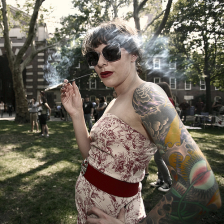

In [76]:
img

In [77]:
from model import Colorization_Model

In [78]:
import torch

In [79]:
model = Colorization_Model(3)
saved_weights_path = './colorization_weights.pth'
loaded_state_dict = torch.load(saved_weights_path)
model.load_state_dict(loaded_state_dict)
model.eval()

Colorization_Model(
  (encoder): Encoder(
    (base): FeatureExtractor(
      (base): EfficientNet(
        (features): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
            (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): Sequential(
            (0): MBConv(
              (block): Sequential(
                (0): Conv2dNormActivation(
                  (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
                  (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
                  (2): SiLU(inplace=True)
                )
                (1): SqueezeExcitation(
                  (avgpool): AdaptiveAvgPool2d(output_size=1)
                  (fc1): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
           

In [80]:
rand_idx = np.random.randint(1000)
rand_idx

579

In [81]:
pred_imgs = np.repeat(img_gray[..., np.newaxis], 3, -1)

In [82]:
pred_img = pred_imgs[rand_idx]

In [83]:
pred_img.shape

(224, 224, 3)

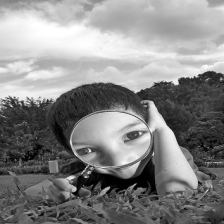

In [84]:
Image.fromarray(pred_img)

In [85]:
pred_img = torch.FloatTensor(pred_img).unsqueeze(0)

In [86]:
pred_img.shape

torch.Size([1, 224, 224, 3])

In [87]:
pred_img = pred_img.permute(0, 3, 1, 2)

In [88]:
pred_img.shape

torch.Size([1, 3, 224, 224])

In [89]:
pred_img.shape

torch.Size([1, 3, 224, 224])

In [90]:
with torch.no_grad():
    lab_pred = model(pred_img)

In [91]:
pred = lab_pred.numpy().squeeze()
pred_array = np.transpose(pred, (1, 2, 0))
pred_array.shape

(224, 224, 2)

In [92]:
pred_img.numpy().squeeze()[0].shape, pred_array.shape

((224, 224), (224, 224, 2))

In [93]:
predicted = np.zeros((224, 224, 3), dtype=np.float32)
predicted[:,:,0] = pred_img.numpy().squeeze()[0]
predicted[:,:,1:] = pred_array

In [94]:
transposed_image_array = np.transpose(predicted, (2, 0, 1))

In [95]:
predicted.shape, transposed_image_array.shape

((224, 224, 3), (3, 224, 224))

In [96]:
import matplotlib.pyplot as plt

In [97]:
label_image = np.zeros((224, 224, 3), dtype=np.float32)
label_image[:,:,0] = pred_img.numpy().squeeze()[0]
label_image[:,:,1:] = img_lab[rand_idx]

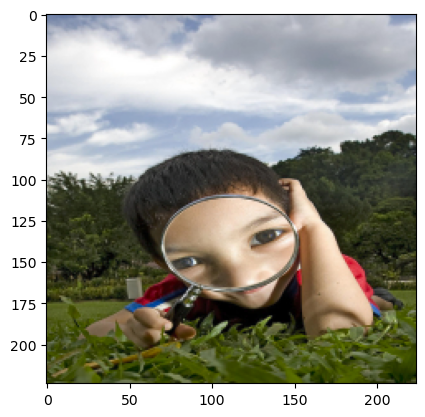

In [98]:
label_image = label_image.astype("uint8")
label_image = cv2.cvtColor(label_image, cv2.COLOR_LAB2RGB)
plt.imshow(label_image)

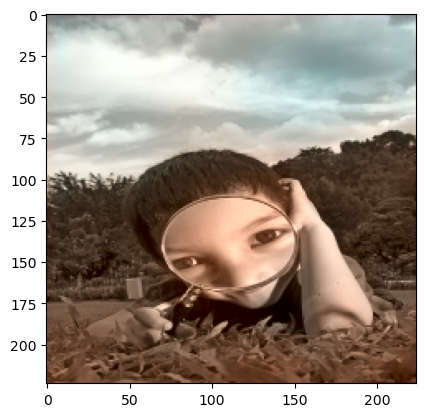

In [99]:
predicted = predicted.astype("uint8")
predicted = cv2.cvtColor(predicted, cv2.COLOR_LAB2RGB)
plt.imshow(predicted)

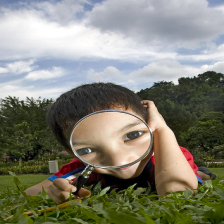

In [100]:
Image.fromarray(labels[rand_idx])